In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5437,ham,Am slow in using biola's fne,NaN,NaN,NaN
4691,ham,"By march ending, i should be ready. But will c...",NaN,NaN,NaN
1200,ham,Otherwise had part time job na-tuition..,NaN,NaN,NaN
4763,ham,Hi.:)technical support.providing assistance to...,NaN,NaN,NaN
1390,ham,"I wonder how you got online, my love ? Had you...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
1167,ham,Lol now I'm after that hot air balloon!
2799,ham,"House-Maid is the murderer, coz the man was mu..."
5469,ham,Ok lor.
1982,ham,Hey i will be late... i'm at amk. Need to drin...
1591,ham,That's my honeymoon outfit. :)


In [10]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
5464,ham,I will treasure every moment we spend together...
5106,ham,Ding me on ya break fassyole! Blacko from londn
2001,ham,Idea will soon get converted to live:)
3159,ham,How much did ur hdd casing cost.
3265,ham,tap & spile at seven. * Is that pub on gas st ...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23d2cb8bbd0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

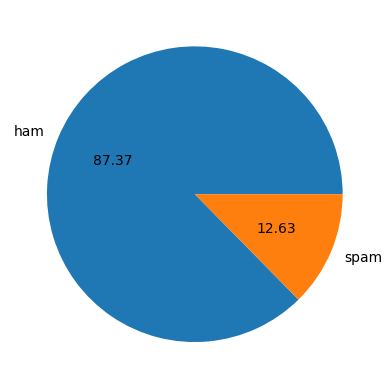

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [27]:
df['num_chrs'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_chrs
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_chrs,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sents'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_chrs,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_chrs', 'num_words', 'num_sents']].describe()

,num_chrs,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df[df['target'] == 0][['num_chrs', 'num_words', 'num_sents']].describe()

,num_chrs,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
df[df['target'] == 1][['num_chrs', 'num_words', 'num_sents']].describe()

,num_chrs,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_chrs', ylabel='Count'>

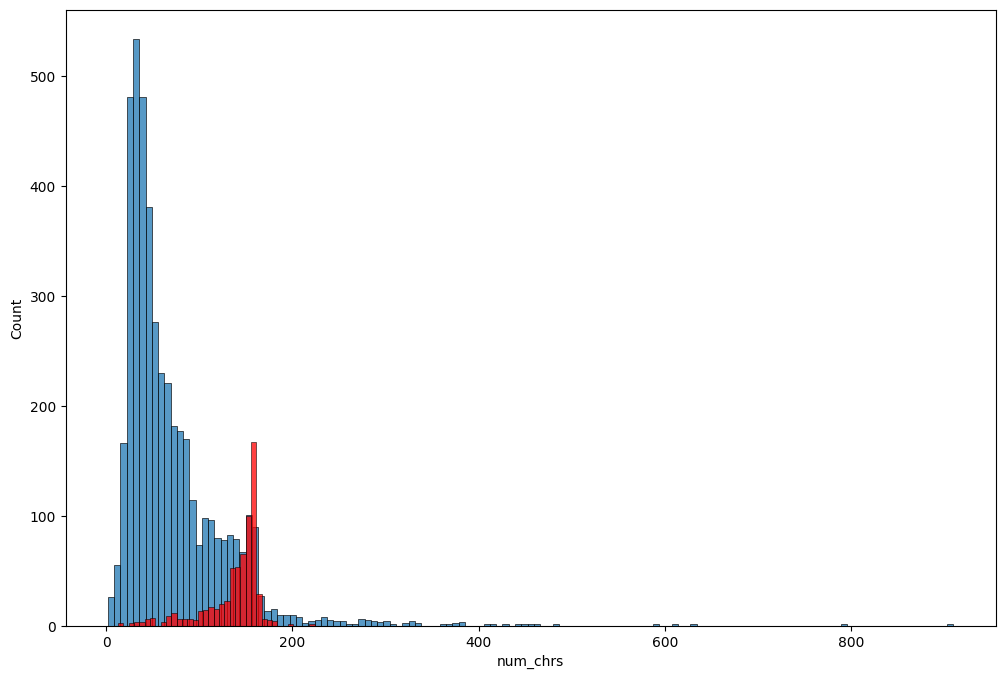

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_chrs'])
sns.histplot(df[df['target'] == 1]['num_chrs'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

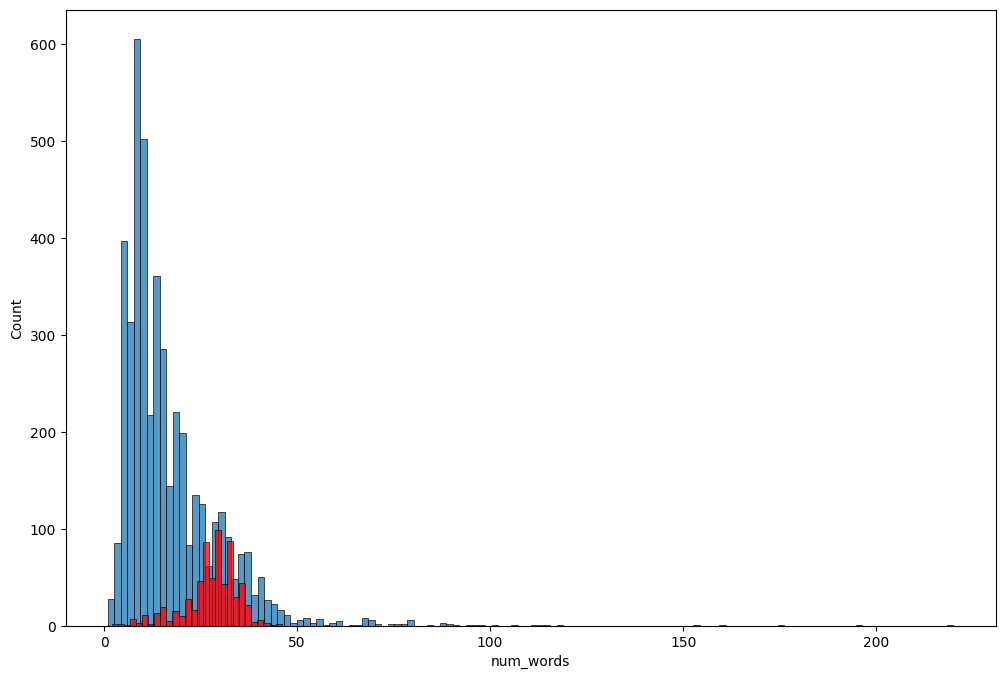

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

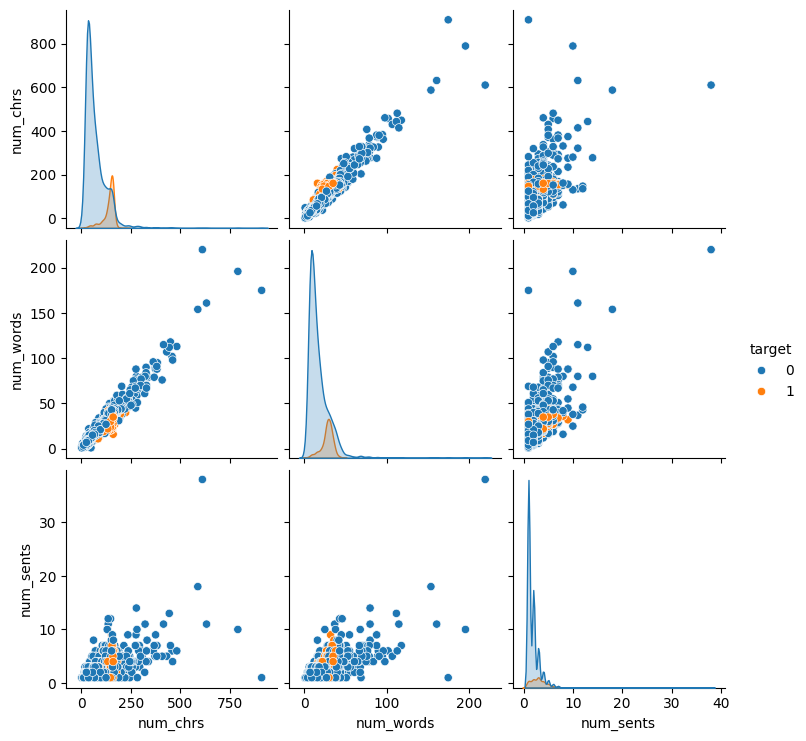

In [39]:
sns.pairplot(df, hue='target')

<Axes: >

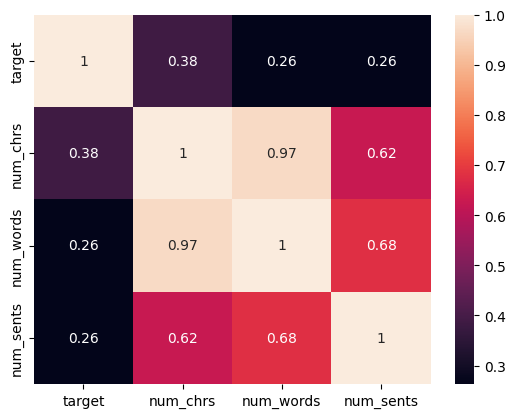

In [40]:
sns.heatmap(df.select_dtypes(include=[float, int]).corr(), annot=True)

In [44]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return ' '.join(y)

In [45]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [47]:
df['transformed_text'] = df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_chrs,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [50]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

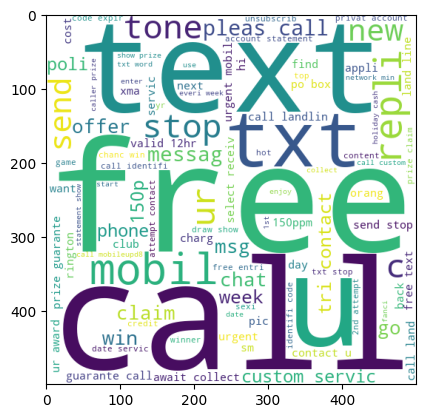

In [51]:
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

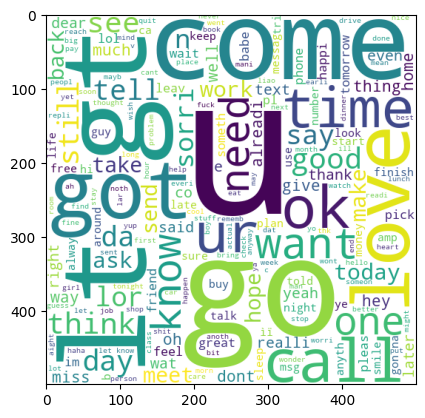

In [53]:
plt.imshow(ham_wc)

In [54]:
df.head()

,target,text,num_chrs,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

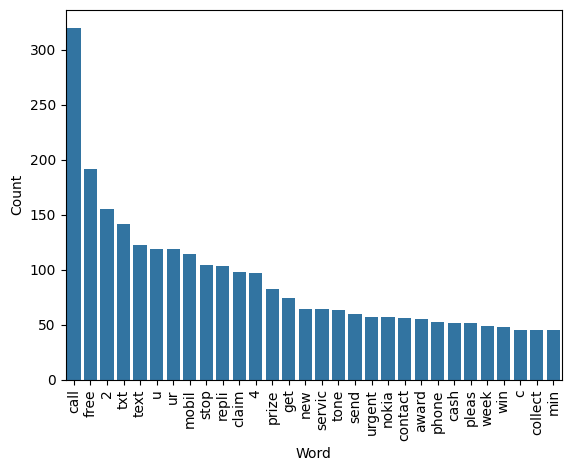

In [57]:
from collections import Counter
sns.barplot(x='Word', y='Count',data=pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count']))
plt.xticks(rotation='vertical')
plt.show()

In [58]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35404

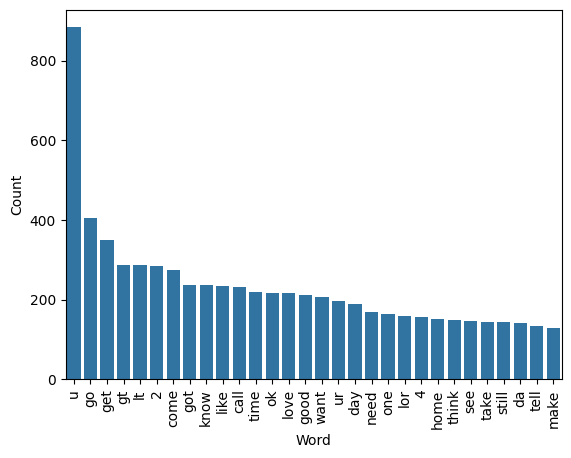

In [60]:
from collections import Counter
sns.barplot(x='Word', y='Count',data=pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count']))
plt.xticks(rotation='vertical')
plt.show()

In [81]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [82]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [83]:
X.shape

(5169, 6708)

In [84]:
y = df['target'].values

In [85]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [95]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [117]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [119]:
clfs = {
    'GaussianNB' : gnb,
    'MultinomialNB' : mnb,
    'BernoulliNB' : bnb,
    'SVC' : svc,
    'KNeighborsClassifier' : knc,
    'DecisionTreeClassifier' : dtc,
    'LogisticRegression' : lrc,
    'RandomForestClassifier' : rfc,
    'AdaBoostClassifier' : abc,
    'BaggingClassifier' : bc,
    'ExtraTreesClassifier' : etc,
    'GradientBoostingClassifier' : gbdt,
    'XGBClassifier' : xgb
}

In [120]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [122]:
train_classifier(lrc, X_train, y_train, X_test, y_test)

(0.9516441005802708, 0.94)

In [123]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    curr_accuracy, curr_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"{name} -> Accuracy : {curr_accuracy}, Precision : {curr_precision}")
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)

GaussianNB -> Accuracy : 0.8762088974854932, Precision : 0.5231481481481481
MultinomialNB -> Accuracy : 0.9593810444874274, Precision : 1.0
BernoulliNB -> Accuracy : 0.9700193423597679, Precision : 0.9734513274336283
SVC -> Accuracy : 0.9661508704061895, Precision : 0.9813084112149533
KNeighborsClassifier -> Accuracy : 0.9003868471953579, Precision : 1.0
DecisionTreeClassifier -> Accuracy : 0.9574468085106383, Precision : 0.8357142857142857
LogisticRegression -> Accuracy : 0.9516441005802708, Precision : 0.94
RandomForestClassifier -> Accuracy : 0.971953578336557, Precision : 1.0
AdaBoostClassifier -> Accuracy : 0.9613152804642167, Precision : 0.9454545454545454
BaggingClassifier -> Accuracy : 0.9584139264990329, Precision : 0.8625954198473282
ExtraTreesClassifier -> Accuracy : 0.9729206963249516, Precision : 0.9824561403508771
GradientBoostingClassifier -> Accuracy : 0.9526112185686654, Precision : 0.9238095238095239
XGBClassifier -> Accuracy : 0.9729206963249516, Precision : 0.943548

In [148]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 
                               'Accuracy' : accuracy_scores, 
                               'Precision' : precision_scores}).sort_values('Precision', ascending=False)

In [149]:
performance_df

,Algorithm,Accuracy,Precision
1,MultinomialNB,0.959381,1.000000
4,KNeighborsClassifier,0.900387,1.000000
7,RandomForestClassifier,0.971954,1.000000
10,ExtraTreesClassifier,0.972921,0.982456
3,SVC,0.966151,0.981308
2,BernoulliNB,0.970019,0.973451
8,AdaBoostClassifier,0.961315,0.945455
12,XGBClassifier,0.972921,0.943548
6,LogisticRegression,0.951644,0.940000
11,GradientBoostingClassifier,0.952611,0.923810


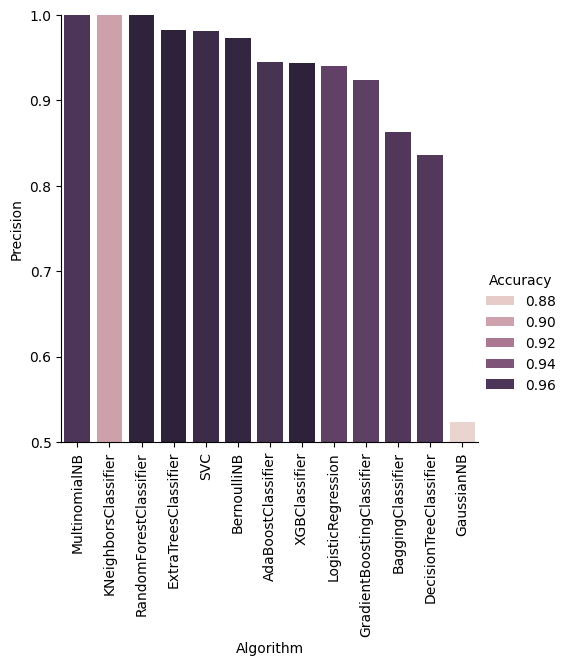

In [165]:
sns.catplot(
    data=performance_df, kind="bar",
    x="Algorithm", y="Precision", hue="Accuracy",
    height=5
)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [170]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))